In [1]:
library(limma)
library(edgeR)

Read the count table

In [2]:
cc <- read.csv("counts.csv")
head(cc)

X Geneid          sorted_reads.mfc_cnt_2.bam sorted_reads.mfc_dac_2.bam
1 0 ENSG00000223972   18                         57                      
2 1 ENSG00000227232 2441                       4172                      
3 2 ENSG00000278267    0                          0                      
4 3 ENSG00000243485    3                         11                      
5 4 ENSG00000237613    0                          0                      
6 5 ENSG00000268020    0                          0                      
  sorted_reads.mfc_dac_1.bam sorted_reads.mfc_dac_3.bam
1   46                         56                      
2 3644                       4329                      
3    0                          0                      
4    8                         13                      
5    0                          0                      
6    0                          0                      
  sorted_reads.yb5_dac_3.bam sorted_reads.yb5_cnt_1.bam
1  215                         59                      
2 5629                       4055                      
3    0                          0                      
4   23                         12                      
5    0                          1                      
6    0                          0                      
  sorted_reads.mfc_cnt_1.bam sorted_reads.yb5_cnt_3.bam
1   11                         32                      
2 2089                       2568                      
3    0                          0                      
4    2                          9                      
5    0                          0                      
6    0                          1                      
  sorted_reads.yb5_dac_1.bam sorted_reads.yb5_dac_2.bam
1  278                        203                      
2 6803                       4957                      
3    0                          0                      
4   33                         26                      
5    2                          1                      
6    0                          0                      
  sorted_reads.yb5_cnt_2.bam sorted_reads.mfc_cnt_3.bam
1   35                         55                      
2 2568                       7559                      
3    0                          0                      
4    7                          8                      
5    0                          0                      
6    0                          0

Do the table formatting

In [3]:
rownames(cc) <- cc[,2]
cc <- cc[, -c(1,2)]
o <- order(colnames(cc))
cc <- cc[, o]
ccl <- apply(cc, c(1,2), function(x) log2(x+1))

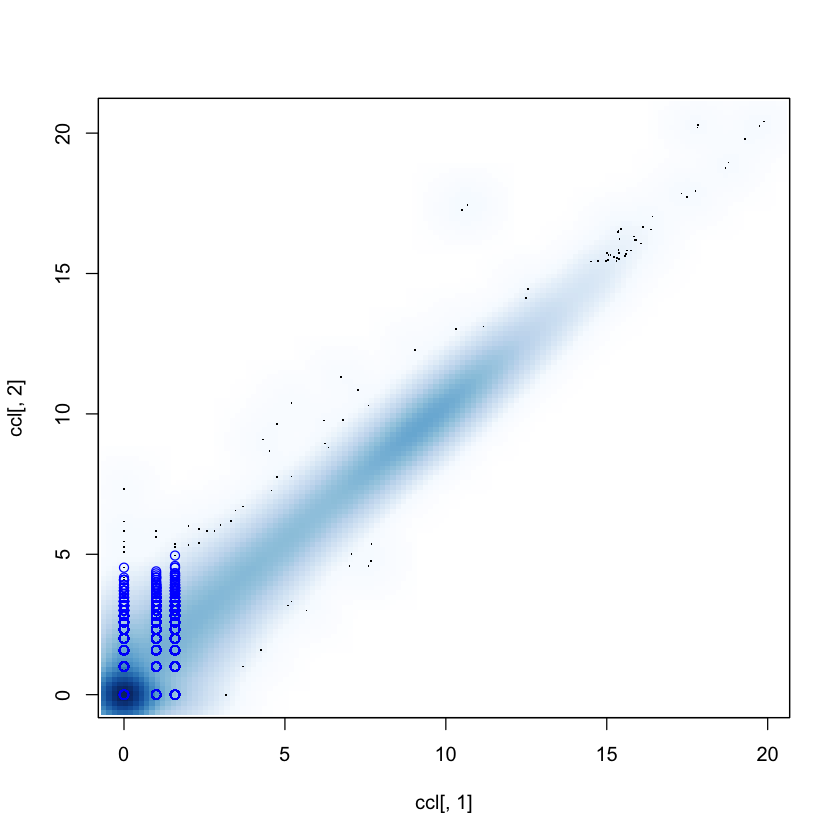

In [4]:
smoothScatter(ccl[,1], ccl[,2])
idx <- which(ccl[,1]<2 & ccl[,2]<5)
points(ccl[idx,1], ccl[idx,2], col="blue")

Adjust the column names

In [5]:
length(idx)
dim(cc)

[1] 34983

[1] 57992    12

In [6]:
tmp <- colnames(cc)
colnames(cc) <- sapply(tmp, function(x) substr(x, 14, 22))
colnames(ccl) <- sapply(tmp, function(x) substr(x, 14, 22))

In [7]:
head(cc)

mfc_cnt_1 mfc_cnt_2 mfc_cnt_3 mfc_dac_1 mfc_dac_2 mfc_dac_3
ENSG00000223972   11        18        55        46        57        56     
ENSG00000227232 2089      2441      7559      3644      4172      4329     
ENSG00000278267    0         0         0         0         0         0     
ENSG00000243485    2         3         8         8        11        13     
ENSG00000237613    0         0         0         0         0         0     
ENSG00000268020    0         0         0         0         0         0     
                yb5_cnt_1 yb5_cnt_2 yb5_cnt_3 yb5_dac_1 yb5_dac_2 yb5_dac_3
ENSG00000223972   59        35        32       278       203       215     
ENSG00000227232 4055      2568      2568      6803      4957      5629     
ENSG00000278267    0         0         0         0         0         0     
ENSG00000243485   12         7         9        33        26        23     
ENSG00000237613    1         0         0         2         1         0     
ENSG00000268020    0         0         1         0         0         0

In [8]:
head(ccl)

mfc_cnt_1 mfc_cnt_2 mfc_cnt_3 mfc_dac_1 mfc_dac_2 mfc_dac_3
ENSG00000223972  3.584963  4.247928  5.807355  5.554589  5.857981  5.832890
ENSG00000227232 11.029287 11.253847 12.884171 11.831703 12.026869 12.080151
ENSG00000278267  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
ENSG00000243485  1.584963  2.000000  3.169925  3.169925  3.584963  3.807355
ENSG00000237613  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
ENSG00000268020  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
                yb5_cnt_1 yb5_cnt_2 yb5_cnt_3 yb5_dac_1 yb5_dac_2 yb5_dac_3
ENSG00000223972  5.906891  5.169925  5.044394  8.124121  7.672425  7.754888
ENSG00000227232 11.985842 11.326991 11.326991 12.732167 12.275543 12.458919
ENSG00000278267  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
ENSG00000243485  3.700440  3.000000  3.321928  5.087463  4.754888  4.584963
ENSG00000237613  1.000000  0.000000  0.000000  1.584963  1.000000  0.000000
ENSG00000268020  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000

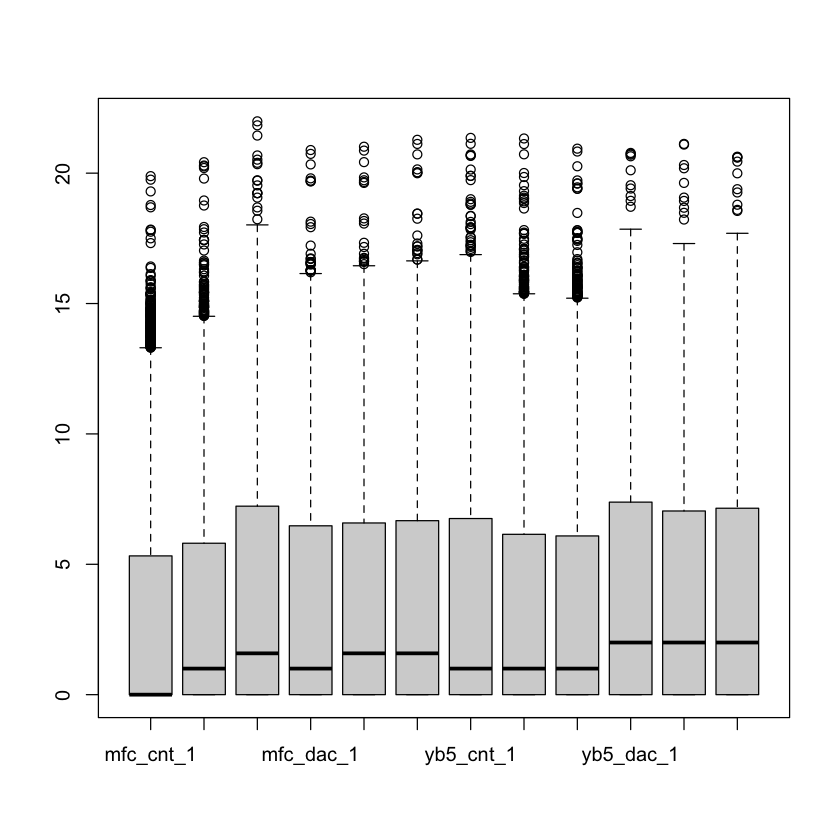

In [9]:
boxplot(ccl)

Read the design metadata

In [10]:
meta <- read.table("metadata.txt", sep="\t", header=T)
rownames(meta) <- as.character(meta[,1])
o <- order(rownames(meta))
meta <- meta[o, ]
meta

FileName  celline treatment
mfc_cnt_1 mfc_cnt_1 mfc     cnt      
mfc_cnt_2 mfc_cnt_2 mfc     cnt      
mfc_cnt_3 mfc_cnt_3 mfc     cnt      
mfc_dac_1 mfc_dac_1 mfc     dac      
mfc_dac_2 mfc_dac_2 mfc     dac      
mfc_dac_3 mfc_dac_3 mfc     dac      
yb5_cnt_1 yb5_cnt_1 yb5     cnt      
yb5_cnt_2 yb5_cnt_2 yb5     cnt      
yb5_cnt_3 yb5_cnt_3 yb5     cnt      
yb5_dac_1 yb5_dac_1 yb5     cnt      
yb5_dac_2 yb5_dac_2 yb5     cnt      
yb5_dac_3 yb5_dac_3 yb5     cnt

In [11]:
targets <- meta[, c("celline", "treatment")]
targets <- as.data.frame(targets)

In [12]:
targets

celline treatment
mfc_cnt_1 mfc     cnt      
mfc_cnt_2 mfc     cnt      
mfc_cnt_3 mfc     cnt      
mfc_dac_1 mfc     dac      
mfc_dac_2 mfc     dac      
mfc_dac_3 mfc     dac      
yb5_cnt_1 yb5     cnt      
yb5_cnt_2 yb5     cnt      
yb5_cnt_3 yb5     cnt      
yb5_dac_1 yb5     cnt      
yb5_dac_2 yb5     cnt      
yb5_dac_3 yb5     cnt

Create design object

In [13]:
Treat <- factor(paste(targets$celline,targets$treatment,sep="."))
design <- model.matrix(~0+Treat)
colnames(design) <- levels(Treat)

In [14]:
design

mfc.cnt mfc.dac yb5.cnt
1  1       0       0      
2  1       0       0      
3  1       0       0      
4  0       1       0      
5  0       1       0      
6  0       1       0      
7  0       0       1      
8  0       0       1      
9  0       0       1      
10 0       0       1      
11 0       0       1      
12 0       0       1

Do the dispersion estimate and model fitting

In [15]:
y <- DGEList(counts=cc)
y <- estimateDisp(y, design)
fit <- glmFit(y, design)

Set up the biological question with a contrast

In [16]:
cm <- makeContrasts( mfc.cnt-mfc.dac, levels=design)
cm

Contrasts
Levels    mfc.cnt - mfc.dac
  mfc.cnt  1               
  mfc.dac -1               
  yb5.cnt  0

Do the model fit and get top genes

In [17]:
lrt <- glmLRT(fit, contrast=cm)
topOnes <- topTags(lrt, n=dim(cc)[1])$table

In [18]:
head(topOnes, n=50)

logFC     logCPM     LR        PValue       FDR         
ENSG00000233276 -5.703099  5.9162987 243.92073 5.493388e-55 3.185726e-50
ENSG00000141756 -2.501588  6.0074403 193.90297 4.471368e-44 1.296518e-39
ENSG00000226383 -5.534574  3.5313765 173.87071 1.056378e-39 2.042050e-35
ENSG00000164850 -2.078655  5.0686256 173.16300 1.507899e-39 2.186152e-35
ENSG00000084207 -4.253757  8.2322890 170.89071 4.727468e-39 5.483106e-35
ENSG00000163362 -2.521056  5.2121847 151.69374 7.392005e-35 7.144619e-31
ENSG00000135926 -2.922313  5.4675657 149.71721 1.998809e-34 1.540543e-30
ENSG00000104870 -3.433664  3.5342194 149.59540 2.125180e-34 1.540543e-30
ENSG00000180964 -4.335465  3.5329774 141.26409 1.408627e-32 9.076565e-29
ENSG00000104518 -5.387493  3.1888639 123.85316 9.071447e-29 5.260713e-25
ENSG00000197582 -5.278091  4.5133934 116.55376 3.595004e-27 1.895286e-23
ENSG00000204019 -9.918227 -0.6362576 101.07093 8.874789e-24 4.288889e-20
ENSG00000182704 -1.798445  5.1259700  95.06534 1.842038e-22 8.217189e-19
ENSG00000105219 -4.317743  0.5699180  94.51764 2.429186e-22 1.006238e-18
ENSG00000102024 -2.757694  4.2441337  83.43320 6.590574e-20 2.548004e-16
ENSG00000172139 -1.993189  4.0623091  79.84664 4.046272e-19 1.466571e-15
ENSG00000160447 -2.468747  3.9630904  77.24381 1.511047e-18 5.154625e-15
ENSG00000206557 -3.233202  0.8473956  73.38309 1.067772e-17 3.440123e-14
ENSG00000142273 -3.679722  2.0576244  73.07182 1.250169e-17 3.815780e-14
ENSG00000185269 -2.818678  7.0564054  71.85205 2.319519e-17 6.725676e-14
ENSG00000100504 -1.225585  6.3600612  69.98786 5.967063e-17 1.647819e-13
ENSG00000141574 -2.059939  2.7079635  65.11322 7.071611e-16 1.864077e-12
ENSG00000180667 -3.019311  3.8312463  64.82469 8.186680e-16 2.064182e-12
ENSG00000229131 -8.653637 -1.7872946  59.55112 1.191584e-14 2.879263e-11
ENSG00000105974  2.641631  6.6239356  58.33806 2.207323e-14 5.120284e-11
ENSG00000166342 -5.481015 -1.3646599  57.79505 2.909009e-14 6.263842e-11
ENSG00000182534 -1.824629  5.2405685  57.79011 2.916329e-14 6.263842e-11
ENSG00000074416 -1.734053  3.9329130  57.64903 3.133174e-14 6.489250e-11
ENSG00000173267 -3.525948  1.1458353  55.80017 8.022465e-14 1.604272e-10
ENSG00000136425 -3.066962  2.9669399  54.00445 2.000356e-13 3.866822e-10
ENSG00000100373 -4.828312  0.6886064  53.83824 2.176943e-13 4.072428e-10
ENSG00000157600  1.326333  5.9063247  53.36695 2.767130e-13 5.006024e-10
ENSG00000211897 -7.418733 -2.7777059  53.30992 2.848648e-13 5.006024e-10
ENSG00000006555 -4.293480  3.8714568  52.87900 3.547430e-13 6.050663e-10
ENSG00000162433  1.328405  4.3254864  52.58738 4.115262e-13 6.818636e-10
ENSG00000251026 -4.412753  0.5830247  52.28839 4.791981e-13 7.719348e-10
ENSG00000114638 -5.507392 -1.8435934  52.07641 5.338234e-13 8.366888e-10
ENSG00000126838 -3.191187 -1.0053643  50.66550 1.095278e-12 1.671509e-09
ENSG00000269842 -7.331674 -2.8392675  50.53497 1.170602e-12 1.740655e-09
ENSG00000156711 -1.204530  4.7882501  49.93310 1.590781e-12 2.306314e-09
ENSG00000211892 -7.458537 -1.1134785  49.14284 2.379853e-12 3.366157e-09
ENSG00000095321 -2.193409  4.1892771  49.03405 2.515581e-12 3.473418e-09
ENSG00000230159 -7.250118 -2.8993756  48.23830 3.774439e-12 5.090401e-09
ENSG00000107742 -3.278429  1.2324994  47.83923 4.626414e-12 6.097613e-09
ENSG00000129038 -1.426747  4.4651952  47.08209 6.807482e-12 8.772877e-09
ENSG00000237523 -3.369142  1.5944370  46.82920 7.745071e-12 9.764177e-09
ENSG00000137642 -1.455876  6.8786362  46.72793 8.155828e-12 1.006325e-08
ENSG00000261578 -2.321949  1.9443346  46.47956 9.257932e-12 1.118512e-08
ENSG00000249917 -2.607830  1.3151994  46.34441 9.919007e-12 1.173925e-08
ENSG00000134759  0.969678  7.6116472  45.99307 1.186723e-11 1.376409e-08

## Simple pairwise comparison

In [19]:
cc2 <- cc[,1:6]
group <- factor(c(1,1,1,2,2,2))
y <- DGEList(counts=cc2,group=group)
y <- calcNormFactors(y)
design <- model.matrix(~group)
y <- estimateDisp(y,design)

fit <- glmFit(y,design)
lrt <- glmLRT(fit)
topOnes_pairwise <- topTags(lrt, n=dim(cc2)[1])$table

In [20]:
head(topOnes_pairwise)

logFC     logCPM   LR        PValue        FDR          
ENSG00000130600  5.505566 9.008124 1041.4478 1.758697e-228 1.019903e-223
ENSG00000135480  4.606337 5.098251  792.1216 2.786028e-174 8.078366e-170
ENSG00000070985  6.610261 2.469754  625.4816 4.803161e-138 9.284831e-134
ENSG00000147174  3.857756 3.692567  606.1356 7.749302e-134 1.123494e-129
ENSG00000105974 -2.766143 5.721369  605.2399 1.213603e-133 1.407585e-129
ENSG00000198883  7.718994 2.154230  589.9396 2.582475e-130 2.496048e-126

In [21]:
length(intersect(rownames(topOnes)[1:500], rownames(topOnes_pairwise)[1:500]))

[1] 207

## Deseq2 pairwise

In [22]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, 

In [23]:
cc2 <- cc[,1:6]
conds <- c("cnt","cnt","cnt",  "dac", "dac", "dac")
colData<-data.frame(condition=as.factor(conds))
dds <- DESeqDataSetFromMatrix(countData = cc2,colData = colData,design = formula(colData) ) 
dds <- DESeq(dds)
res <- results(dds)
o <- order(res[,"pvalue"])
res <- res[o, ]

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [24]:
res

log2 fold change (MLE): condition dac vs cnt 
Wald test p-value: condition dac vs cnt 
DataFrame with 57992 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat       pvalue
                <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSG00000130600 21561.070        5.50280  0.133035   41.3636  0.00000e+00
ENSG00000135480  1420.357        4.60734  0.155206   29.6854 1.18459e-193
ENSG00000105974  2226.621       -2.76973  0.102993  -26.8924 2.69261e-159
ENSG00000147174   529.979        3.86159  0.159577   24.1989 2.28414e-129
ENSG00000086548  2890.536        2.69275  0.115384   23.3373 1.85514e-120
...                   ...            ...       ...       ...          ...
ENSG00000239415         0             NA        NA        NA           NA
ENSG00000223692         0             NA        NA        NA           NA
ENSG00000202239         0             NA        NA        NA           NA
ENSG00000160307         0             NA        NA        N

DESeq2 and edgeR agree quite a lot

In [25]:
length(intersect(rownames(res)[1:500], rownames(topOnes_pairwise)[1:500]))

[1] 385

In [26]:
library(Vennerable)

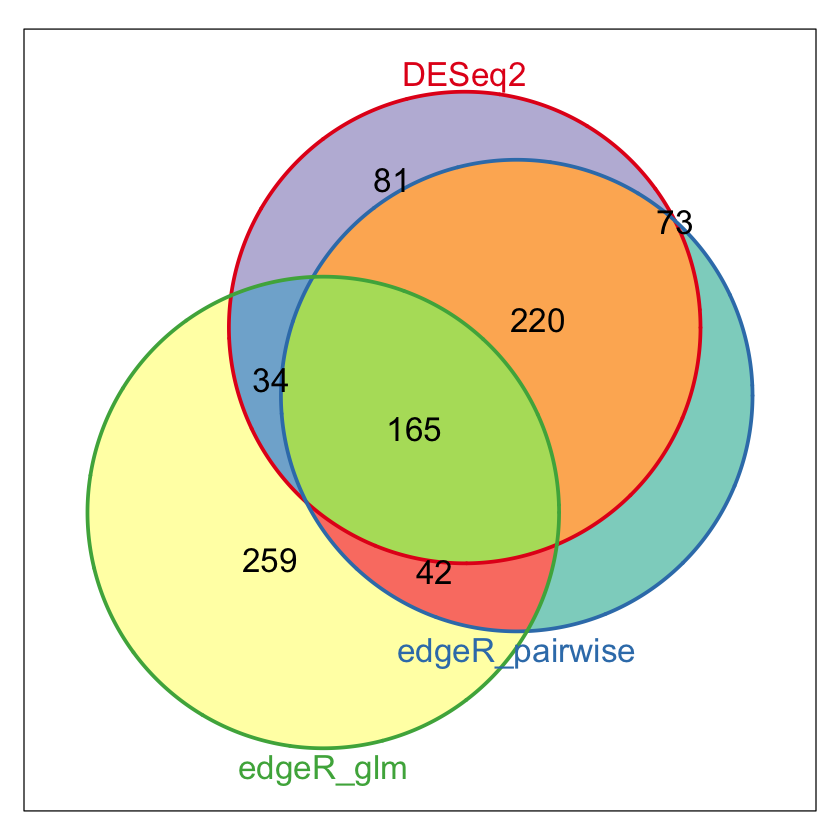

In [27]:
i1 <- rownames(res)[1:500]
i2 <- rownames(topOnes_pairwise)[1:500]
i3 <- rownames(topOnes)[1:500]

vennD <- Venn ( list(i1, i2, i3), SetNames = c("DESeq2", "edgeR_pairwise","edgeR_glm"))
plot(vennD, doWeights = T, type = "circles")